In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Анализ rusentitweet_train

In [182]:
train_csv = pd.read_csv('rusentitweet_train.csv')

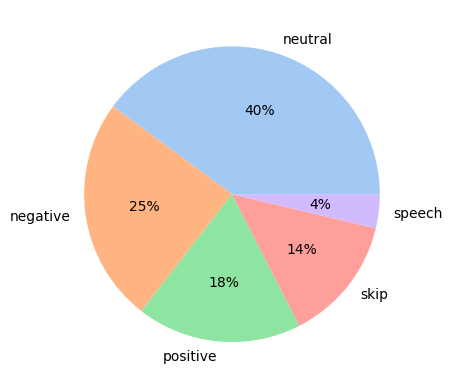

In [229]:
#define data
data = train_csv['label'].value_counts().to_list()
labels = train_csv['label'].value_counts().keys()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Создание своей части - rusentitweet_self_data

In [249]:
train2_csv = pd.read_csv('rusentitweet_self_data', header=0)

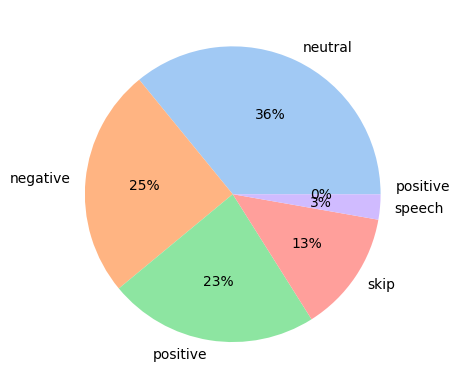

In [230]:
#define data
data = train2_csv['label'].value_counts().to_list()
labels = train2_csv['label'].value_counts().keys()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [250]:
train_senti = train2_csv[(train2_csv['label'] == 'positive') | (train2_csv['label'] == 'negative')]

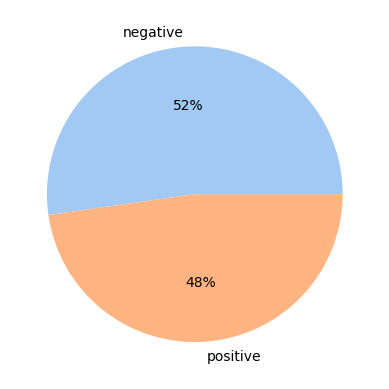

In [235]:
#define data
data = train_senti['label'].value_counts().to_list()
labels = train_senti['label'].value_counts().keys()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [255]:
train_senti = train_senti.reset_index()
train_senti.drop(['index'], axis=1, inplace=True)

train_senti.loc[train_senti[train_senti['label'] == 'positive'].index,'label'] = 1
train_senti.loc[train_senti[train_senti['label'] == 'negative'].index,'label'] = 0

train_senti['label'] = train_senti['label'].astype('int64')

train_senti['label'].value_counts()

label
0    2671
1    2441
Name: count, dtype: int64

In [256]:
train_senti.rename(columns={"text": "Text", "label": "Class"}, inplace=True)

In [257]:
train_senti.drop(['id'], inplace=True, axis=1)
train_senti.head()

,Text,Class
0,@buybread_ я не с порядке!!!!,0
1,@ru_rbc доллар по 30 сделать не хотят значит,0
2,"@LimitaVIP Удивительный гiмн...\nУдивительно, ...",0
3,я срала на эту биологию,0
4,"Пиздец чё вообще было, чувствую как будто меня...",0


In [281]:
from sklearn.model_selection import train_test_split

X_train, X_dev = train_test_split(train_senti, train_size=0.7, stratify=train_senti['Class'], random_state=1)

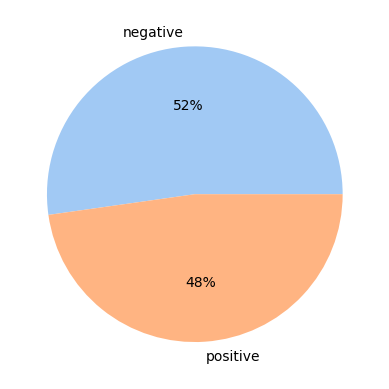

In [284]:
#define data
data = X_train['Class'].value_counts().to_list()
labels = ['negative', 'positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

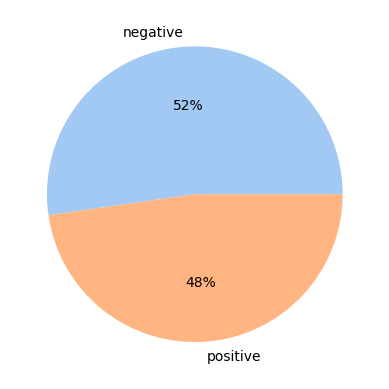

In [285]:
data = X_dev['Class'].value_counts().to_list()
labels = ['negative', 'positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [282]:
X_train['Class'].value_counts()

Class
0    1869
1    1709
Name: count, dtype: int64

In [283]:
X_dev['Class'].value_counts()

Class
0    802
1    732
Name: count, dtype: int64

In [262]:
X_train.to_csv(path_or_buf='./train_first.csv', index=False)
X_dev.to_csv(path_or_buf='./dev_first.csv', index=False)

# Анализ второго датасета

In [322]:
data1 = pd.read_excel('X_y_train.xlsx', index_col=0, header=0, sheet_name=0)  

In [323]:
data1.drop(columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20'], axis=1, inplace=True)

In [326]:
data2 = pd.read_excel('X_y_test.xlsx', index_col=0, header=0, sheet_name=0)  

In [327]:
data2.drop(columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20'], axis=1, inplace=True)

In [328]:
data2[data2['Class'] == 1].count()

Text     27
Class    27
dtype: int64

In [329]:
data2[data2['Class'] == -1].count()

Text     23
Class    23
dtype: int64

In [335]:
data = pd.concat([data1, data2])

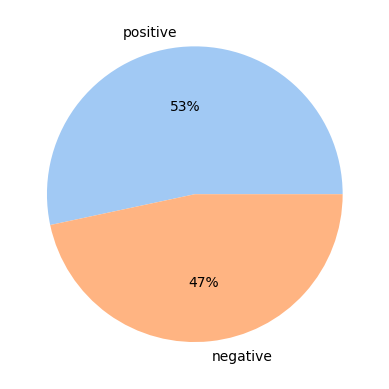

In [299]:
#define data
data2 = data['Class'].value_counts().to_list()
labels = ['positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [336]:
data = data.reset_index()
data.drop(['N'], axis=1, inplace=True)

data.loc[data[data['Class'] == -1].index,'Class'] = 0

# train_senti['label'] = train_senti['label'].astype('int64')

data['Class'].value_counts()

Class
1    11948
0    10450
Name: count, dtype: int64

In [337]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, train_size=0.7, stratify=data['Class'], random_state=1)
X_train, X_dev = train_test_split(X_train, train_size=0.8, stratify=X_train['Class'], random_state=1)

In [338]:
data['Class'].value_counts()

Class
1    11948
0    10450
Name: count, dtype: int64

In [339]:
X_train['Class'].value_counts()

Class
1    6690
0    5852
Name: count, dtype: int64

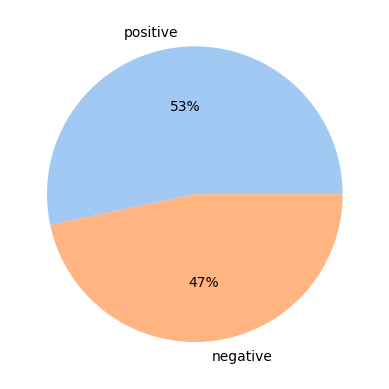

In [344]:
data = X_train['Class'].value_counts().to_list()
labels = ['positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [340]:
X_dev['Class'].value_counts()

Class
1    1673
0    1463
Name: count, dtype: int64

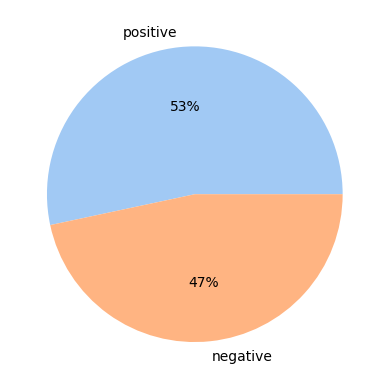

In [345]:
data = X_dev['Class'].value_counts().to_list()
labels = ['positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [341]:
X_test['Class'].value_counts()

Class
1    3585
0    3135
Name: count, dtype: int64

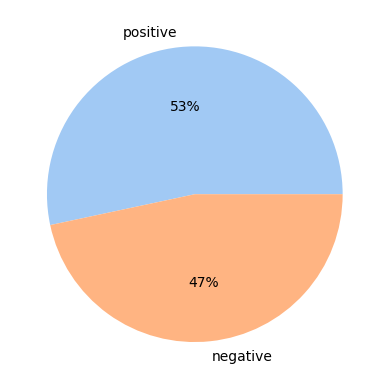

In [346]:
data = X_test['Class'].value_counts().to_list()
labels = ['positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [279]:
X_train.to_csv(path_or_buf='./train_second.csv', index=False)

In [280]:
X_dev.to_csv(path_or_buf='./dev_second.csv', index=False)
X_test.to_csv(path_or_buf='./test_second.csv', index=False)

# Анализ rusentitweet_test

In [286]:
test_csv = pd.read_csv('rusentitweet_test.csv')

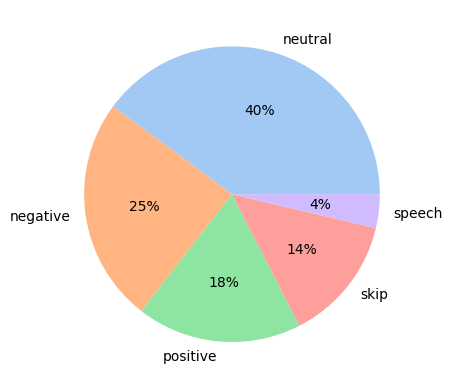

In [247]:
#define data
data = test_csv['label'].value_counts().to_list()
labels = test_csv['label'].value_counts().keys()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [288]:
data_first = test_csv[(test_csv['label'] == 'positive') | (test_csv['label'] == 'negative')]

In [289]:
data_first = data_first.reset_index()
data_first.drop(['index'], axis=1, inplace=True)

data_first.loc[data_first[data_first['label'] == 'positive'].index,'label'] = 1
data_first.loc[data_first[data_first['label'] == 'negative'].index,'label'] = 0

# train_senti['label'] = train_senti['label'].astype('int64')

data_first['label'].value_counts()

label
0    660
1    483
Name: count, dtype: int64

In [290]:
data_first.rename(columns={"text": "Text", "label": "Class"}, inplace=True)

In [291]:
data_first.to_csv(path_or_buf='./test_first.csv', index=False)

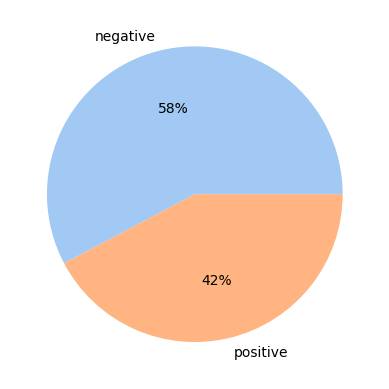

In [292]:
#define data
data = data_first['Class'].value_counts().to_list()
labels = ['negative', 'positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Создание объединенного датасета

In [301]:
rutrain_csv = pd.read_csv('rusentitweet_train.csv')
rutest_csv = pd.read_csv('rusentitweet_test.csv', header=0)

data2_train = pd.read_excel('X_y_train.xlsx', index_col=0, header=0, sheet_name=0) 
data2_test = pd.read_excel('X_y_test.xlsx', index_col=0, header=0, sheet_name=0)  

In [303]:
data1 = pd.concat([rutrain_csv, rutest_csv])

In [305]:
data2 = pd.concat([data2_train, data2_test])

In [307]:
ready_data1 = data1[(data1['label'] == 'positive') | (data1['label'] == 'negative') |
                    (data1['label'] == 'neutral')]

In [155]:
ready_data1['label'].value_counts()

label
neutral     5341
negative    3298
positive    2414
Name: count, dtype: int64

In [156]:
positive_data2 = data2[(data2['Class'] == 1)]
positive_data2['Class'].value_counts()

Class
1    11948
Name: count, dtype: int64

In [157]:
positive_data2.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20'], axis=1, inplace=True)

/var/folders/94/hvx_67xd46x5khdml3kckt080000gn/T/ipykernel_6347/1778921959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_data2.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',


In [158]:
ready_data1.drop(['id'], inplace=True, axis=1)

/var/folders/94/hvx_67xd46x5khdml3kckt080000gn/T/ipykernel_6347/297426647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_data1.drop(['id'], inplace=True, axis=1)


In [159]:
ready_data1.rename(columns={"text": "Text", "label": "Class"}, inplace=True)

/var/folders/94/hvx_67xd46x5khdml3kckt080000gn/T/ipykernel_6347/1745578100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_data1.rename(columns={"text": "Text", "label": "Class"}, inplace=True)


In [160]:
ready_data1 = ready_data1.reset_index()
ready_data1.drop(['index'], axis=1, inplace=True)

In [162]:
ready_data1.loc[ready_data1[ready_data1['Class'] == 'positive'].index,'Class'] = 1
ready_data1.loc[ready_data1[ready_data1['Class'] == 'negative'].index,'Class'] = 2
ready_data1.loc[ready_data1[ready_data1['Class'] == 'neutral'].index,'Class'] = 0

ready_data1['Class'] = ready_data1['Class'].astype('int64')

ready_data1['Class'].value_counts()

Class
0    5341
2    3298
1    2414
Name: count, dtype: int64

In [163]:
new_data = pd.concat([ready_data1, positive_data2[0:5341-2414]])

In [164]:
new_data['Class'].value_counts()

Class
1    5341
0    5341
2    3298
Name: count, dtype: int64

In [165]:
negative_data2 = data2[(data2['Class'] == -1)]
negative_data2['Class'].value_counts()

Class
-1    10450
Name: count, dtype: int64

In [168]:
negative_data2 = negative_data2.reset_index()
negative_data2.drop(['N'], axis=1, inplace=True)

negative_data2.loc[negative_data2[negative_data2['Class'] == -1].index,'Class'] = 2

negative_data2['Class'].value_counts()

Class
2    10450
Name: count, dtype: int64

In [172]:
negative_data2.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20'], axis=1, inplace=True)

In [174]:
new_data = pd.concat([new_data, negative_data2[0:5341-3298]])
new_data['Class'].value_counts()

Class
1    5341
0    5341
2    5341
Name: count, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(new_data, train_size=0.8, stratify=new_data['Class'])
X_train, X_dev = train_test_split(X_train, train_size=0.8, stratify=X_train['Class'])

In [216]:
X_train['Class'].value_counts()

Class
0    3418
1    3418
2    3418
Name: count, dtype: int64

In [217]:
X_dev['Class'].value_counts()

Class
2    855
1    855
0    854
Name: count, dtype: int64

In [218]:
X_test['Class'].value_counts()

Class
0    1069
2    1068
1    1068
Name: count, dtype: int64

In [219]:
print(X_train.shape[0], X_dev.shape[0], X_test.shape[0])

10254 2564 3205


In [220]:
X_train.to_csv(path_or_buf='./train2.csv', index=False)
X_dev.to_csv(path_or_buf='./dev2.csv', index=False)
X_test.to_csv(path_or_buf='./test2.csv', index=False)

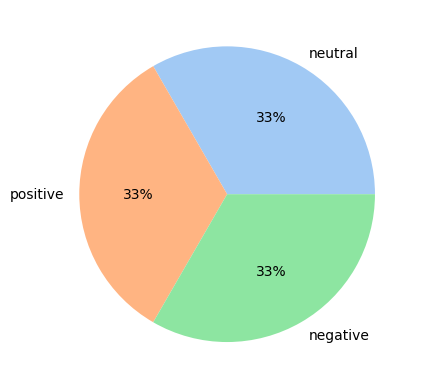

In [214]:
#define data
data2 = new_data['Class'].value_counts().to_list()
labels = ['neutral', 'positive', 'negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()